In [1]:
# Import other modules not related to PySpark
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline

In [2]:
# Import PySpark related modules
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains\
, isnan, udf, hour, array_min, array_max, countDistinct
from pyspark.sql.types import *

MAX_MEMORY = '15G'
# Initialize a spark session.
conf = pyspark.SparkConf().setMaster("local[*]") \
        .set('spark.executor.heartbeatInterval', 10000) \
        .set('spark.network.timeout', 10000) \
        .set("spark.core.connection.ack.wait.timeout", "3600") \
        .set("spark.executor.memory", MAX_MEMORY) \
        .set("spark.driver.memory", MAX_MEMORY)
def init_spark():
    spark = SparkSession \
        .builder \
        .appName("Pyspark guide") \
        .config(conf=conf) \
        .getOrCreate()
    return spark

spark = init_spark()
# Укажите путь к CSV файлу
csv_file_path = "data/1.csv"

# Прочитайте CSV файл в DataFrame
df = spark.read.csv(csv_file_path, header=True, sep=';', inferSchema=True)

col = ['timestamp','site_id','period_id','actual_consumption','actual_pv', 
       'load_00', 'load_01', 'load_02', 'load_03', 'load_04', 'load_05', 'load_06', 'load_07', 'load_08', 'load_09',
       'load_10', 'load_11', 'load_12', 'load_13', 'load_14', 'load_15', 'load_16', 'load_17', 'load_18', 'load_19',
       'pv_00', 'pv_01', 'pv_02', 'pv_03', 'pv_04', 'pv_05', 'pv_06', 'pv_07', 'pv_08', 'pv_09',
       'pv_10', 'pv_11', 'pv_12', 'pv_13', 'pv_14', 'pv_15', 'pv_16', 'pv_17', 'pv_18', 'pv_19'
      ]

df = df[col]
limited_data_pandas = df.limit(10)

limited_data_pandas.toPandas()

,timestamp,site_id,period_id,actual_consumption,actual_pv,load_00,load_01,load_02,load_03,load_04,...,pv_10,pv_11,pv_12,pv_13,pv_14,pv_15,pv_16,pv_17,pv_18,pv_19
0,2014-07-19 18:45:00,1,0,51.625703,22.712489,52.816828,53.501688,54.079161,52.683472,52.590445,...,3.443197,3.263787,3.099029,2.947728,2.808784,2.681188,2.564013,2.456409,2.357593,2.266848
1,2014-07-19 19:30:00,1,0,52.281257,6.618605,51.452796,51.676287,51.329882,51.690879,51.538671,...,1.706679,1.669097,1.634584,1.602891,1.573786,1.547058,1.522513,1.499974,1.479275,1.460266
2,2014-07-19 20:00:00,1,0,50.719565,1.452209,51.313898,52.199835,52.340547,51.844138,52.661063,...,0.745077,0.786033,0.823644,0.858184,0.889903,0.919032,0.945781,0.970346,0.992904,1.013620
3,2014-07-19 20:15:00,1,0,51.901162,0.580877,51.950475,51.624345,50.867434,51.538997,51.331161,...,0.707628,0.751643,0.792064,0.829183,0.863271,0.894574,0.923321,0.949721,0.973963,0.996226
4,2014-07-19 21:00:00,1,0,51.250007,0.000000,52.218820,52.176852,51.745211,51.809854,51.835710,...,0.775193,0.813691,0.849044,0.881509,0.911323,0.938702,0.963845,0.986935,1.008138,1.027610
5,2014-07-19 22:45:00,1,0,51.790326,0.000000,51.857548,51.891930,51.912236,52.005984,51.929889,...,0.787065,0.824593,0.859056,0.890704,0.919767,0.946456,0.970966,0.993473,1.014143,1.033124
6,2014-07-19 23:00:00,1,0,52.460697,0.000000,52.347502,52.285460,52.333257,52.231521,52.220741,...,0.787065,0.824593,0.859056,0.890704,0.919767,0.946456,0.970966,0.993473,1.014143,1.033124
7,2014-07-19 23:15:00,1,0,51.831117,0.000000,52.024522,52.214861,52.192664,52.226268,52.920358,...,0.787065,0.824593,0.859056,0.890704,0.919767,0.946456,0.970966,0.993473,1.014143,1.033124
8,2014-07-19 23:45:00,1,0,52.030533,0.000000,52.202840,52.344978,53.099632,52.468551,52.493247,...,0.787065,0.824593,0.859056,0.890704,0.919767,0.946456,0.970966,0.993473,1.014143,1.033124
9,2014-07-20 00:00:00,1,0,51.754934,0.000000,51.995633,52.805283,52.204891,52.246713,52.270049,...,0.787065,0.824593,0.859056,0.890704,0.919767,0.946456,0.970966,0.993473,1.014143,1.033124


In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, expr
from pyspark.sql.types import IntegerType

# Предположим, что ваш DataFrame называется df
# Замените 'timestamp' на фактическое имя вашей колонки с временем
df = df.withColumn("timestamp", df["timestamp"].cast("timestamp"))

# Добавление новой колонки 'DAY' с условием
df = df.withColumn(
    "DAY",
    when(
        (expr("hour(timestamp) >= 8") & expr("hour(timestamp) < 20")),
        1
    ).otherwise(0)
)

# Если необходимо привести колонку 'DAY' к типу IntegerType
df = df.withColumn("DAY", df["DAY"].cast(IntegerType()))

# Вывод первых нескольких строк DataFrame для проверки результата
limited_data_pandas = df.limit(10)

limited_data_pandas.toPandas()

,timestamp,site_id,period_id,actual_consumption,actual_pv,load_00,load_01,load_02,load_03,load_04,...,pv_11,pv_12,pv_13,pv_14,pv_15,pv_16,pv_17,pv_18,pv_19,DAY
0,2014-07-19 18:45:00,1,0,51.625703,22.712489,52.816828,53.501688,54.079161,52.683472,52.590445,...,3.263787,3.099029,2.947728,2.808784,2.681188,2.564013,2.456409,2.357593,2.266848,1
1,2014-07-19 19:30:00,1,0,52.281257,6.618605,51.452796,51.676287,51.329882,51.690879,51.538671,...,1.669097,1.634584,1.602891,1.573786,1.547058,1.522513,1.499974,1.479275,1.460266,1
2,2014-07-19 20:00:00,1,0,50.719565,1.452209,51.313898,52.199835,52.340547,51.844138,52.661063,...,0.786033,0.823644,0.858184,0.889903,0.919032,0.945781,0.970346,0.992904,1.013620,0
3,2014-07-19 20:15:00,1,0,51.901162,0.580877,51.950475,51.624345,50.867434,51.538997,51.331161,...,0.751643,0.792064,0.829183,0.863271,0.894574,0.923321,0.949721,0.973963,0.996226,0
4,2014-07-19 21:00:00,1,0,51.250007,0.000000,52.218820,52.176852,51.745211,51.809854,51.835710,...,0.813691,0.849044,0.881509,0.911323,0.938702,0.963845,0.986935,1.008138,1.027610,0
5,2014-07-19 22:45:00,1,0,51.790326,0.000000,51.857548,51.891930,51.912236,52.005984,51.929889,...,0.824593,0.859056,0.890704,0.919767,0.946456,0.970966,0.993473,1.014143,1.033124,0
6,2014-07-19 23:00:00,1,0,52.460697,0.000000,52.347502,52.285460,52.333257,52.231521,52.220741,...,0.824593,0.859056,0.890704,0.919767,0.946456,0.970966,0.993473,1.014143,1.033124,0
7,2014-07-19 23:15:00,1,0,51.831117,0.000000,52.024522,52.214861,52.192664,52.226268,52.920358,...,0.824593,0.859056,0.890704,0.919767,0.946456,0.970966,0.993473,1.014143,1.033124,0
8,2014-07-19 23:45:00,1,0,52.030533,0.000000,52.202840,52.344978,53.099632,52.468551,52.493247,...,0.824593,0.859056,0.890704,0.919767,0.946456,0.970966,0.993473,1.014143,1.033124,0
9,2014-07-20 00:00:00,1,0,51.754934,0.000000,51.995633,52.805283,52.204891,52.246713,52.270049,...,0.824593,0.859056,0.890704,0.919767,0.946456,0.970966,0.993473,1.014143,1.033124,0


## RandomForest

In [5]:
# Инициализация SparkSession
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

spark = SparkSession.builder.appName("RandomForestRegression").getOrCreate()

# Выбор нужных колонок
selected_columns = ['actual_consumption', 'load_00', 'load_01', 'load_02', 'load_03', 'load_04']
data_subset = df.select(selected_columns)

# Создание столбца features, объединяющего все признаки в один вектор
assembler = VectorAssembler(inputCols=selected_columns[1:], outputCol="features")
data_subset = assembler.transform(data_subset)

# Переименование столбца actual_consumption в label
data_subset = data_subset.withColumnRenamed("actual_consumption", "label")

# Разделение данных на обучающую и тестовую выборки
(training_data, test_data) = data_subset.randomSplit([0.8, 0.2], seed=42)

# Инициализация модели RandomForestRegressor
rf = RandomForestRegressor(featuresCol="features", labelCol="label", seed=42)

# Создание сети параметров для подбора
param_grid_rf = (ParamGridBuilder()
                 .addGrid(rf.maxDepth, [5, 10])
                 .addGrid(rf.numTrees, [10, 20])
                 .build())

# Инициализация оценщика (evaluator)
evaluator_mse = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mse")

# Инициализация кросс-валидации
cross_val_rf = CrossValidator(estimator=rf, estimatorParamMaps=param_grid_rf, evaluator=evaluator_mse, numFolds=3)

# Обучение модели на обучающей выборке с кросс-валидацией
cv_model_rf = cross_val_rf.fit(training_data)

# Прогнозирование на тестовой выборке
predictions = cv_model_rf.transform(test_data)

# Оценка качества модели - MSE
mse_evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mse")
mse = mse_evaluator.evaluate(predictions)
print(f"Mean Squared Error: {mse}")

# Вывод лучших параметров
best_params_rf = cv_model_rf.bestModel.extractParamMap()
print("Best Parameters for RandomForest:")
for param, value in best_params_rf.items():
    print(f"{param.name}: {value}")

Mean Squared Error: 5.864530735927928
Best Parameters for RandomForest:
bootstrap: True
cacheNodeIds: False
checkpointInterval: 10
featureSubsetStrategy: auto
featuresCol: features
impurity: variance
labelCol: label
leafCol: 
maxBins: 32
maxDepth: 10
maxMemoryInMB: 256
minInfoGain: 0.0
minInstancesPerNode: 1
minWeightFractionPerNode: 0.0
numTrees: 20
predictionCol: prediction
seed: 42
subsamplingRate: 1.0


1. **bootstrap:**
   - *Описание:* Определяет, следует ли использовать метод Bootstrap Aggregating (Bagging) при построении деревьев в лесу. Если установлен в `True`, то случайная подвыборка данных с возвращением используется для обучения каждого дерева. Если `False`, используется вся обучающая выборка.

2. **cacheNodeIds:**
   - *Описание:* Указывает, следует ли кешировать идентификаторы узлов для улучшения производительности. Если установлен в `True`, узлы кешируются.

3. **checkpointInterval:**
   - *Описание:* Интервал (в номерах итераций), через который следует проверять точку контроля. Точка контроля может использоваться для ускорения восстановления обучения в случае сбоя.

4. **featureSubsetStrategy:**
   - *Описание:* Стратегия выбора подмножества признаков для разделения узлов. Значение `auto` позволяет алгоритму выбрать лучший способ автоматически, основываясь на типе данных.

5. **featuresCol:**
   - *Описание:* Название столбца, содержащего вектор признаков.

6. **impurity:**
   - *Описание:* Критерий измерения неоднородности. В регрессии часто используется критерий `variance`, который измеряет среднеквадратичное отклонение целевых переменных в узле.

7. **labelCol:**
   - *Описание:* Название столбца, содержащего целевую переменную (метку).

8. **leafCol:**
   - *Описание:* Название столбца, содержащего предсказания на листе дерева.

9. **maxBins:**
   - *Описание:* Максимальное количество корзин (бинов), используемых для дискретизации числовых признаков при построении дерева.

10. **maxDepth:**
    - *Описание:* Максимальная глубина каждого дерева в лесу. Указывает, насколько глубоко может разветвляться каждое дерево.

11. **maxMemoryInMB:**
    - *Описание:* Максимальный объем памяти (в мегабайтах), который можно использовать для хранения данных, когда узел строит дерево.

12. **minInfoGain:**
    - *Описание:* Минимальное значение информационного выигрыша, необходимое для разделения узла.

13. **minInstancesPerNode:**
    - *Описание:* Минимальное количество экземпляров, которое должно быть в узле, чтобы продолжить разделение.

14. **minWeightFractionPerNode:**
    - *Описание:* Минимальная взвешенная доля от общей суммы весов (эквивалентно минимальному количеству экземпляров) в узле, необходимая для разделения.

15. **numTrees:**
    - *Описание:* Количество деревьев в случайном лесу.

16. **predictionCol:**
    - *Описание:* Название столбца, содержащего предсказания модели.

17. **seed:**
    - *Описание:* Зерно для инициализации случайных чисел. Устанавливая фиксированное значение, вы можете получить воспроизводимые результаты.

18. **subsamplingRate:**
    - *Описание:* Доля данных, используемая для обучения каждого дерева. Значение 1.0 означает использование всех данных.


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Фактические vs. Предсказанные значения')

Text(0.5, 0, 'Номер наблюдения')

Text(0, 0.5, 'Значение')

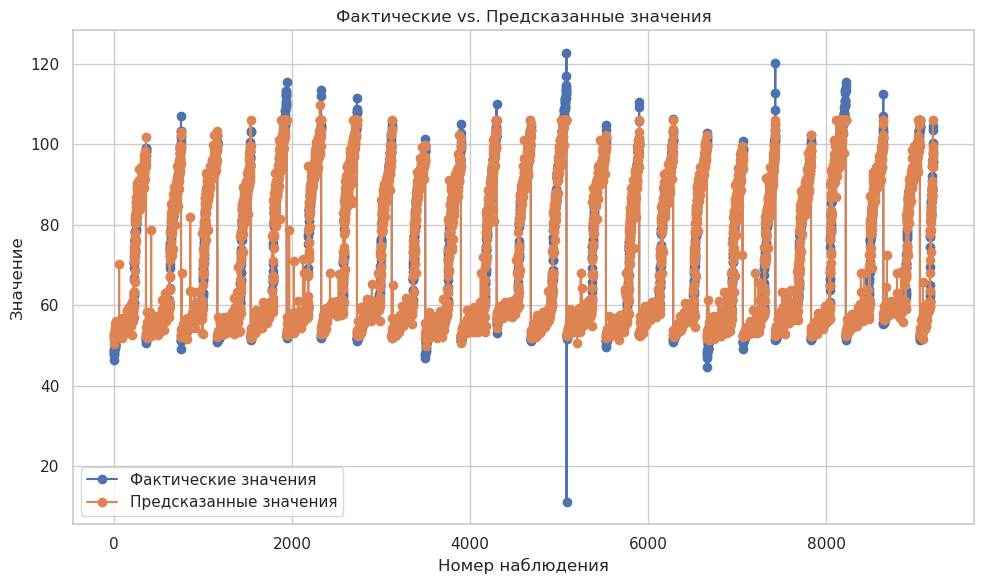

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Преобразование данных в формат Pandas для удобства визуализации
predictions_pd = predictions.select("label", "prediction").toPandas()

# Построение графика фактических значений и предсказанных значений
plt.figure(figsize=(10, 6))
plt.plot(predictions_pd["label"], label="Фактические значения", linestyle='-', marker='o')
plt.plot(predictions_pd["prediction"], label="Предсказанные значения", linestyle='-', marker='o')
plt.title("Фактические vs. Предсказанные значения")
plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.tight_layout()  # Для улучшения компактности
plt.show()

## LogisticRegression

In [12]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, MinMaxScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Инициализация SparkSession
spark = SparkSession.builder.appName("YourAppName").getOrCreate()

# Здесь предполагается, что df - ваш исходный DataFrame

# Выберем только нужные колонки
selected_columns = ['DAY', 'actual_consumption', 'load_00', 'load_01', 'load_02']
data_subset = df.select(selected_columns)

# Переименование столбца DAY в label
data_subset = data_subset.withColumnRenamed("DAY", "label")

# Создание стадий конвейера
vector_assembler = VectorAssembler(inputCols=selected_columns[1:], outputCol="features")
scaler = MinMaxScaler(inputCol='features', outputCol='featureNorm')
lr = LogisticRegression(featuresCol="featureNorm", labelCol="label")

# Создание конвейера
pipeline = Pipeline(stages=[vector_assembler, scaler, lr])

# Разделение данных на обучающую и тестовую выборки
(train_data, test_data) = data_subset.randomSplit([0.8, 0.2], seed=42)

# Оценка качества модели
evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")

# Определение сетки параметров для кросс-валидации
param_grid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.1, 0.01]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# Создание объекта CrossValidator
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=param_grid,
                          evaluator=evaluator,
                          numFolds=5)  # Указание количества складок для кросс-валидации

# Обучение модели на обучающей выборке с использованием кросс-валидации
cv_model = crossval.fit(train_data)

# Получение лучшей модели
best_model = cv_model.bestModel

# Вывод лучших параметров модели
print("Best Model Hyperparameters:")
for param_name, param_value in best_model.stages[-1].extractParamMap().items():
    print(f"{param_name.name}: {param_value}")
    
# Прогнозирование на тестовой выборке
predictions_cv = cv_model.transform(test_data)

# Оценка качества модели
area_under_roc_cv = evaluator.evaluate(predictions_cv)
print(f"Area under ROC curve (cross-validated): {area_under_roc_cv}")

# Метрики классификации
true_positives = predictions_cv.filter("prediction = 1.0 AND label = 1").count()
true_negatives = predictions_cv.filter("prediction = 0.0 AND label = 0").count()
false_positives = predictions_cv.filter("prediction = 1.0 AND label = 0").count()
false_negatives = predictions_cv.filter("prediction = 0.0 AND label = 1").count()

# Accuracy (точность)
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
print(f"Accuracy: {accuracy}")

# Precision (точность)
precision = true_positives / (true_positives + false_positives)
print(f"Precision: {precision}")

# Recall (полнота)
recall = true_positives / (true_positives + false_negatives)
print(f"Recall: {recall}")

# F1 Score (F-мера)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {f1_score}")

# ROC-AUC (площадь под ROC-кривой) - для бинарной классификации
# В данном случае, с использованием PySpark, уже было вычислено area_under_roc_cv

# Вывод матрицы ошибок (Confusion Matrix)
print("Confusion Matrix:")
print(f"True Positives: {true_positives}")
print(f"True Negatives: {true_negatives}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")

Best Model Hyperparameters:
aggregationDepth: 2
elasticNetParam: 0.0
family: auto
featuresCol: featureNorm
fitIntercept: True
labelCol: label
maxBlockSizeInMB: 0.0
maxIter: 100
predictionCol: prediction
probabilityCol: probability
rawPredictionCol: rawPrediction
regParam: 0.01
standardization: True
threshold: 0.5
tol: 1e-06
Area under ROC curve (cross-validated): 0.803846742513137
Accuracy: 0.7992827646163877
Precision: 0.9154801575280218
Recall: 0.6583877995642702
F1 Score: 0.765935876314789
Confusion Matrix:
True Positives: 3022
True Negatives: 4333
False Positives: 279
False Negatives: 1568


### Описание лучших гиперпараметров модели:

- **aggregationDepth:** Параметр, контролирующий глубину агрегации для узлов решающего дерева. Глубина агрегации определяет, сколько уровней поддерева может быть агрегировано вместе как единое дерево. Значение 2 указывает на агрегацию двух уровней поддерева.

- **elasticNetParam:** Параметр, контролирующий смесь между L1 (Lasso) и L2 (Ridge) регуляризацией в логистической регрессии. Значение 0.0 указывает на использование только L2 регуляризации.

- **family:** Параметр, определяющий функцию распределения ошибок. Значение "auto" позволяет алгоритму автоматически выбирать функцию распределения на основе данных.

- **featuresCol:** Имя столбца, содержащего признаки (features).

- **fitIntercept:** Указывает, следует ли включать в модель константу (свободный член).

- **labelCol:** Имя столбца, содержащего метки классов.

- **maxBlockSizeInMB:** Максимальный размер блока в мегабайтах, используемого для ускорения обучения. Значение 0.0 указывает на отсутствие ограничения размера блока.

- **maxIter:** Максимальное количество итераций при обучении.

- **predictionCol:** Имя столбца, содержащего прогнозы классификации.

- **probabilityCol:** Имя столбца, содержащего вероятности принадлежности к классам.

- **rawPredictionCol:** Имя столбца, содержащего необработанные прогнозы модели.

- **regParam:** Параметр регуляризации, контролирующий силу регуляризации. Меньшие значения обозначают более сильную регуляризацию.

- **standardization:** Указывает, следует ли стандартизировать признаки перед обучением модели.

- **threshold:** Порог для бинарной классификации. Если вероятность принадлежности к классу превышает этот порог, объект относится к положительному классу.

- **tol:** Порог сходимости. Обучение прекращается, когда изменение весов модели становится меньше этого значения.

### Метрики производительности модели:

- **Площадь под ROC-кривой (кросс-валидированная):** 0.8038
- **Точность:** 0.7993
- **Точность (Precision):** 0.9155
- **Полнота (Recall):** 0.6584
- **F1-мера:** 0.7659

### Матрица ошибок:

- **Истинно положительные:** 3022
- **Истинно отрицательные:** 4333
- **Ложноположительные:** 279
- **Ложноотрицательные:** 1568


<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

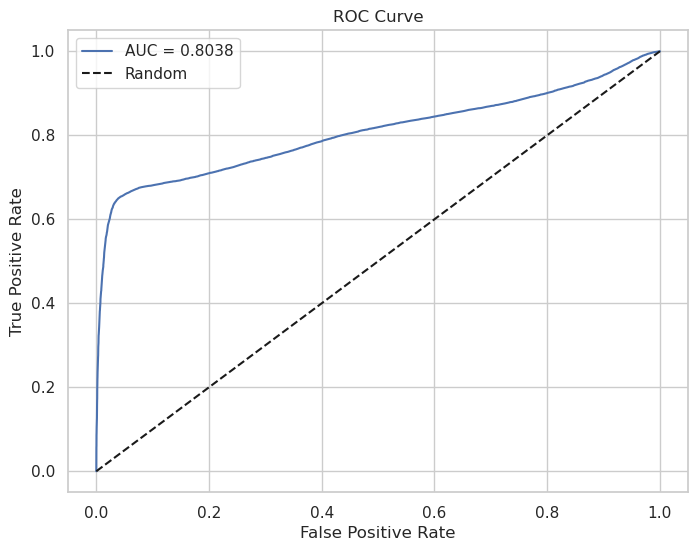

<Axes: >

Text(0.5, 19.049999999999997, 'Predicted Label')

Text(46.25, 0.5, 'True Label')

Text(0.5, 1.0, 'Confusion Matrix')

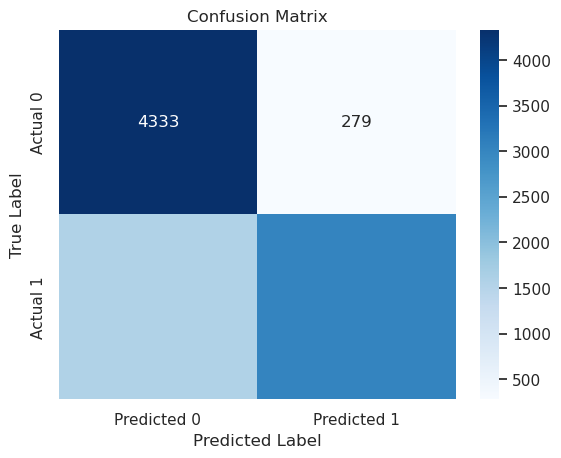

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Визуализация ROC-кривой (при наличии scikit-learn)
roc_curve_df = cv_model.bestModel.stages[-1].summary.roc.toPandas()
plt.figure(figsize=(8, 6))
plt.plot(roc_curve_df['FPR'], roc_curve_df['TPR'], label=f'AUC = {area_under_roc_cv:.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Визуализация матрицы ошибок
conf_matrix = confusion_matrix(predictions_cv.select('label').collect(), predictions_cv.select('prediction').collect())
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()